In [4]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
    
X_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data['label'].values.astype('int32')
    
X_test = test_data.values.astype('float32')

In [5]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [7]:
X_train.shape[1:]

(784,)

In [14]:
train_imgs = X_train.reshape((-1, 28, 28, 1)) / 255.

In [10]:
train_imgs

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [15]:
train_imgs.shape[1:]

(28, 28, 1)

In [16]:
train_imgs.shape

(42000, 28, 28, 1)

In [18]:
train_imgs2 = X_train.reshape((-1,28, 28, 1)) / 255.

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
train_imgs2

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D#畳み込みの処理やプーリングなどの処理を行う
from keras.layers import Activation, Dropout, Flatten, Dense #Flatten：データを1次元にする,Dense:全結合層を連結する
from keras.utils import np_utils
import keras
import tensorflow as tf
import numpy as np
import pandas as pd

num_classes = 10


train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
    
X_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data['label'].values.astype('int32')
#カテゴリカルな値にしておく
y_train = np_utils.to_categorical(y_train, num_classes)
#channel_firstかchannel_lastかによって変わるので気をつける！！
X_train_imgs = X_train.reshape((-1, 28, 28, 1)) / 255.
    
X_test = test_data.values.astype('float32')
X_test_imgs = X_test.reshape((-1, 28, 28, 1)) / 255.
    
model = model_train(X_train_imgs, y_train)
result_org = model_predict(model, X_test_imgs)
result_submit = np.argmax(result_org)
    
result_dict = {
    'ImageId':np.arange(1, len(result_org) + 1),
    'Label': result_submit
}
    
df = pd.DataFrame(result_dict)
df.to_csv("./result.csv", index_label = False, index = False)
print("Prediction is done")
    
def model_train(X, y):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(3, 3))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10))
    
    model.add(Activation('softmax'))
    
    opt = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = opt,
                  metrics = ['accuracy'])
    #エポック数上げると性能が良くなるらしい（このNNの場合）
    model.fit(X, y, batch_size = 32, epochs = 1)
    
    #モデルの保存
    model.save('./digit_recog_cnn2.h5')
    
    return model
    

def model_predict(model, X):
    test_y = model.predict(X)
    return test_y

if __name__ == "__main__":
    main()

Epoch 1/1
42000/42000 [==============================] - 62s 1ms/step - loss: 0.6416 - acc: 0.7940
Prediction is done
Epoch 1/1
42000/42000 [==============================] - 61s 1ms/step - loss: 0.6750 - acc: 0.7804
Prediction is done


In [32]:
tet = np.argmax(result_org, axis = 1)

In [33]:
len(tet)

28000

In [2]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
    
X_train = train_data.iloc[:, 1:].values.astype('int32')
y_train = train_data['label'].values.astype('int32')
    
X_test = test_data.values.astype('float32')

In [68]:
#訓練データを28×28の形に変える
X_train_imgs = X_train.reshape((-1, 28, 28, 1))

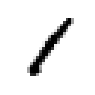

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(img):
    plt.figure(figsize=(1.5, 1.5))
    plt.axis('off')
    if img.ndim == 3:
        img = img[:, :, 0]
    plt.imshow(img, cmap=plt.cm.binary)           
    plt.show()

show_image(X_train_imgs[0])#Zは(224, 224)のint配列

int32


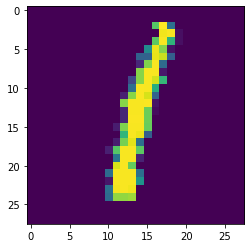

In [18]:
#int型にしないとだめ
X_img = X_train_imgs[0]
print(X_img.dtype)

pilImg = Image.fromarray(X_img[:,:,0])
X_img_r = pilImg.rotate(20)
plt.imshow(X_img_r)

In [26]:
test = np.asarray(X_img_r)
test = test.reshape(28,28,1)
test.shape

(28, 28, 1)

In [90]:
#img_rはpillowになっているので，np.arrayで配列データに変える
X_img_r_new = np.asarray(X_img_r)/255.
X_img_r_new = X_img_r_new.astype('float32')

In [91]:
X_img_r_new.dtype

dtype('float32')

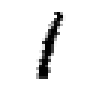

In [77]:
show_image(img_r_new)#Zは(224, 224)のint配列

# データオーギュメンテーションテスト

In [80]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [81]:
print(len(train_data))

42000


In [82]:
y_train[0]

1

In [9]:
#pillowで読み込みたいので一旦int32型にする
X_train = train_data.iloc[:, 1:].values.astype('int32')
y_train = train_data['label'].values.astype('int32')

X_train_imgs = X_train.reshape((-1, 28, 28, 1))

X_train_imgs_new = []
y_train_new = []

for i, X_img in enumerate(X_train_imgs):
    pilImage = Image.fromarray(X_img[:, :, 0])
    pilImage = pilImage.convert("L")
    for angle in range(-20, 20, 5):
        #ノーマル
        data = np.asarray(pilImage)
        X_train_imgs_new.append(data)
        y_train_new.append(y_train[i])
        
        #回転
        X_img_r = pilImage.rotate(angle)
        data = np.asarray(X_img_r)
        X_train_imgs_new.append(data)
        y_train_new.append(y_train[i])
                
        #反転
        X_img_trans = pilImage.transpose(Image.FLIP_LEFT_RIGHT)
        data = np.asarray(X_img_trans)
        X_train_imgs_new.append(data)
        y_train_new.append(y_train[i])

In [10]:
print("New train data:",len(X_train_imgs_new), ",New label data:", len(y_train_new))

New train data: 1008000 ,New label data: 1008000


In [11]:
type(X_train_imgs_new)

list

In [12]:
X_train = np.asarray(X_train_imgs_new)
y_train = np.asarray(y_train_new)

In [36]:
X_train.shape
X_train = X_train.reshape(1008000, 28, 28, 1)
X_train.shape

(1008000, 28, 28, 1)

In [29]:
X_test_imgs = X_test.reshape((-1, 28, 28, 1))

In [30]:
X_test_imgs.shape

(28000, 28, 28, 1)

In [31]:
empty_data_y = np.zeros(28000)

In [214]:
empty_data_y.shape

(28000,)

In [180]:
empty_data_x = np.zeros([300, 28, 28, 3])

In [181]:
empty_data_x.shape

(300, 28, 28, 3)

In [32]:
xy = (X_train, X_test_imgs, y_train, empty_data_y)

In [33]:
np.save("./digit_aug_jupyter.npy", xy)

In [39]:
X_train_imgs, X_test_imgs, y_train, _ = np.load("./digit_aug_jupyter.npy", allow_pickle=True)

In [40]:
X_train_imgs.shape

(1008000, 28, 28, 1)

In [46]:
X_test_imgs = X_test_imgs / 255.

In [47]:
X_test_imgs[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])